## Name- Ranjan Pratap Singh                                                      DS2307

# Glass Identification
## Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\RANJAN\OneDrive\Desktop\glass.csv")

### Exploratory Data Analysis(EDA)  ----->

In [3]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Here in this data set we can see that our features dont have names  and  it contain data from first row itself so first we will use project  description to have coulmn names

In [4]:
clmn1 = [ 'Id number', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass' ]
df1 = pd.DataFrame(columns=clmn1)
df1.loc[1] = df.columns
df.columns = clmn1
df = pd.concat([df1, df], ignore_index=True)
df.reset_index(drop=True, inplace=True)
df

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
1,2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.0,8.4,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7


our data set Glass identification contain 214 rows and 11 columns and all the columns except target variable and Id number has continuous data and our target variable has categorical data so it is a classification problem to train , test and predict the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id number         214 non-null    object
 1   refractive index  214 non-null    object
 2   Sodium            214 non-null    object
 3   Magnesium         214 non-null    object
 4   Aluminum          214 non-null    object
 5   Silicon           214 non-null    object
 6   Potassium         214 non-null    object
 7   Calcium           214 non-null    object
 8   Barium            214 non-null    object
 9   Iron              214 non-null    object
 10  Type of glass     214 non-null    object
dtypes: object(11)
memory usage: 18.5+ KB


#### Here we observe our datatypes . 
We observe that  our dataset contain dtype -  object(string) for all columns including Target variable 
#### We can see that there is no null values but to check it further  the possibility of white sapces    we will  check again

In [6]:
 for i in df.columns:
        print(df[i].value_counts(),'\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64 

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive index, Length: 178, dtype: int64 

13.21    5
13.02    5
13.00    5
13.24    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Sodium, Length: 143, dtype: int64 

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Magnesium, Length: 94, dtype: int64 

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Aluminum, Length: 118, dtype: int64 

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Silicon, Length: 133, dtype: int64 

0.00    30
0.57

after checking value counts we can see that in Type of glass we find 1.1 that is incorrect as all the data in that column are categorical so we will rectify it. Second, we can see in the Iron column we have entry - 0.0.001 that is alos incorrect so we will rectify it.

In [7]:
df.iloc[0, df.columns.get_loc('Iron')] = 0.001
df.iloc[0, df.columns.get_loc('Type of glass')] = 1


here we will use IDnumber as the index 

In [8]:
df.set_index(df.columns[0], inplace=True)

In [9]:
df

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.0,8.4,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7


Converting dtypes of the data

In [10]:
df = df.astype(float)
df['Type of glass'] = df['Type of glass'].astype(int)


In [11]:
df.dtypes

refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type of glass         int32
dtype: object

we can see the changed dtypes 

In [12]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057014,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097436,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see except for Magnesium , Barium, Iron  all the data have almost same so most of the data is normally distributed

if we see for outliers we can observe that Potassium, Calcium, barium,Iron we will further check in this Project later. 

### Data Visualization --->

-- Univariate Analysis

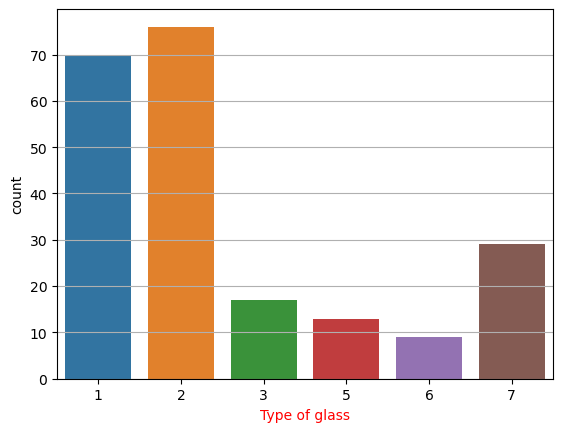

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [13]:
sns.countplot(x='Type of glass' , data = df )
plt.xlabel('Type of glass',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Type of glass'].value_counts()

We can see that most of the glass are from 1 and 2

In [14]:
df1 = df.drop(['Type of glass'],axis= 1)

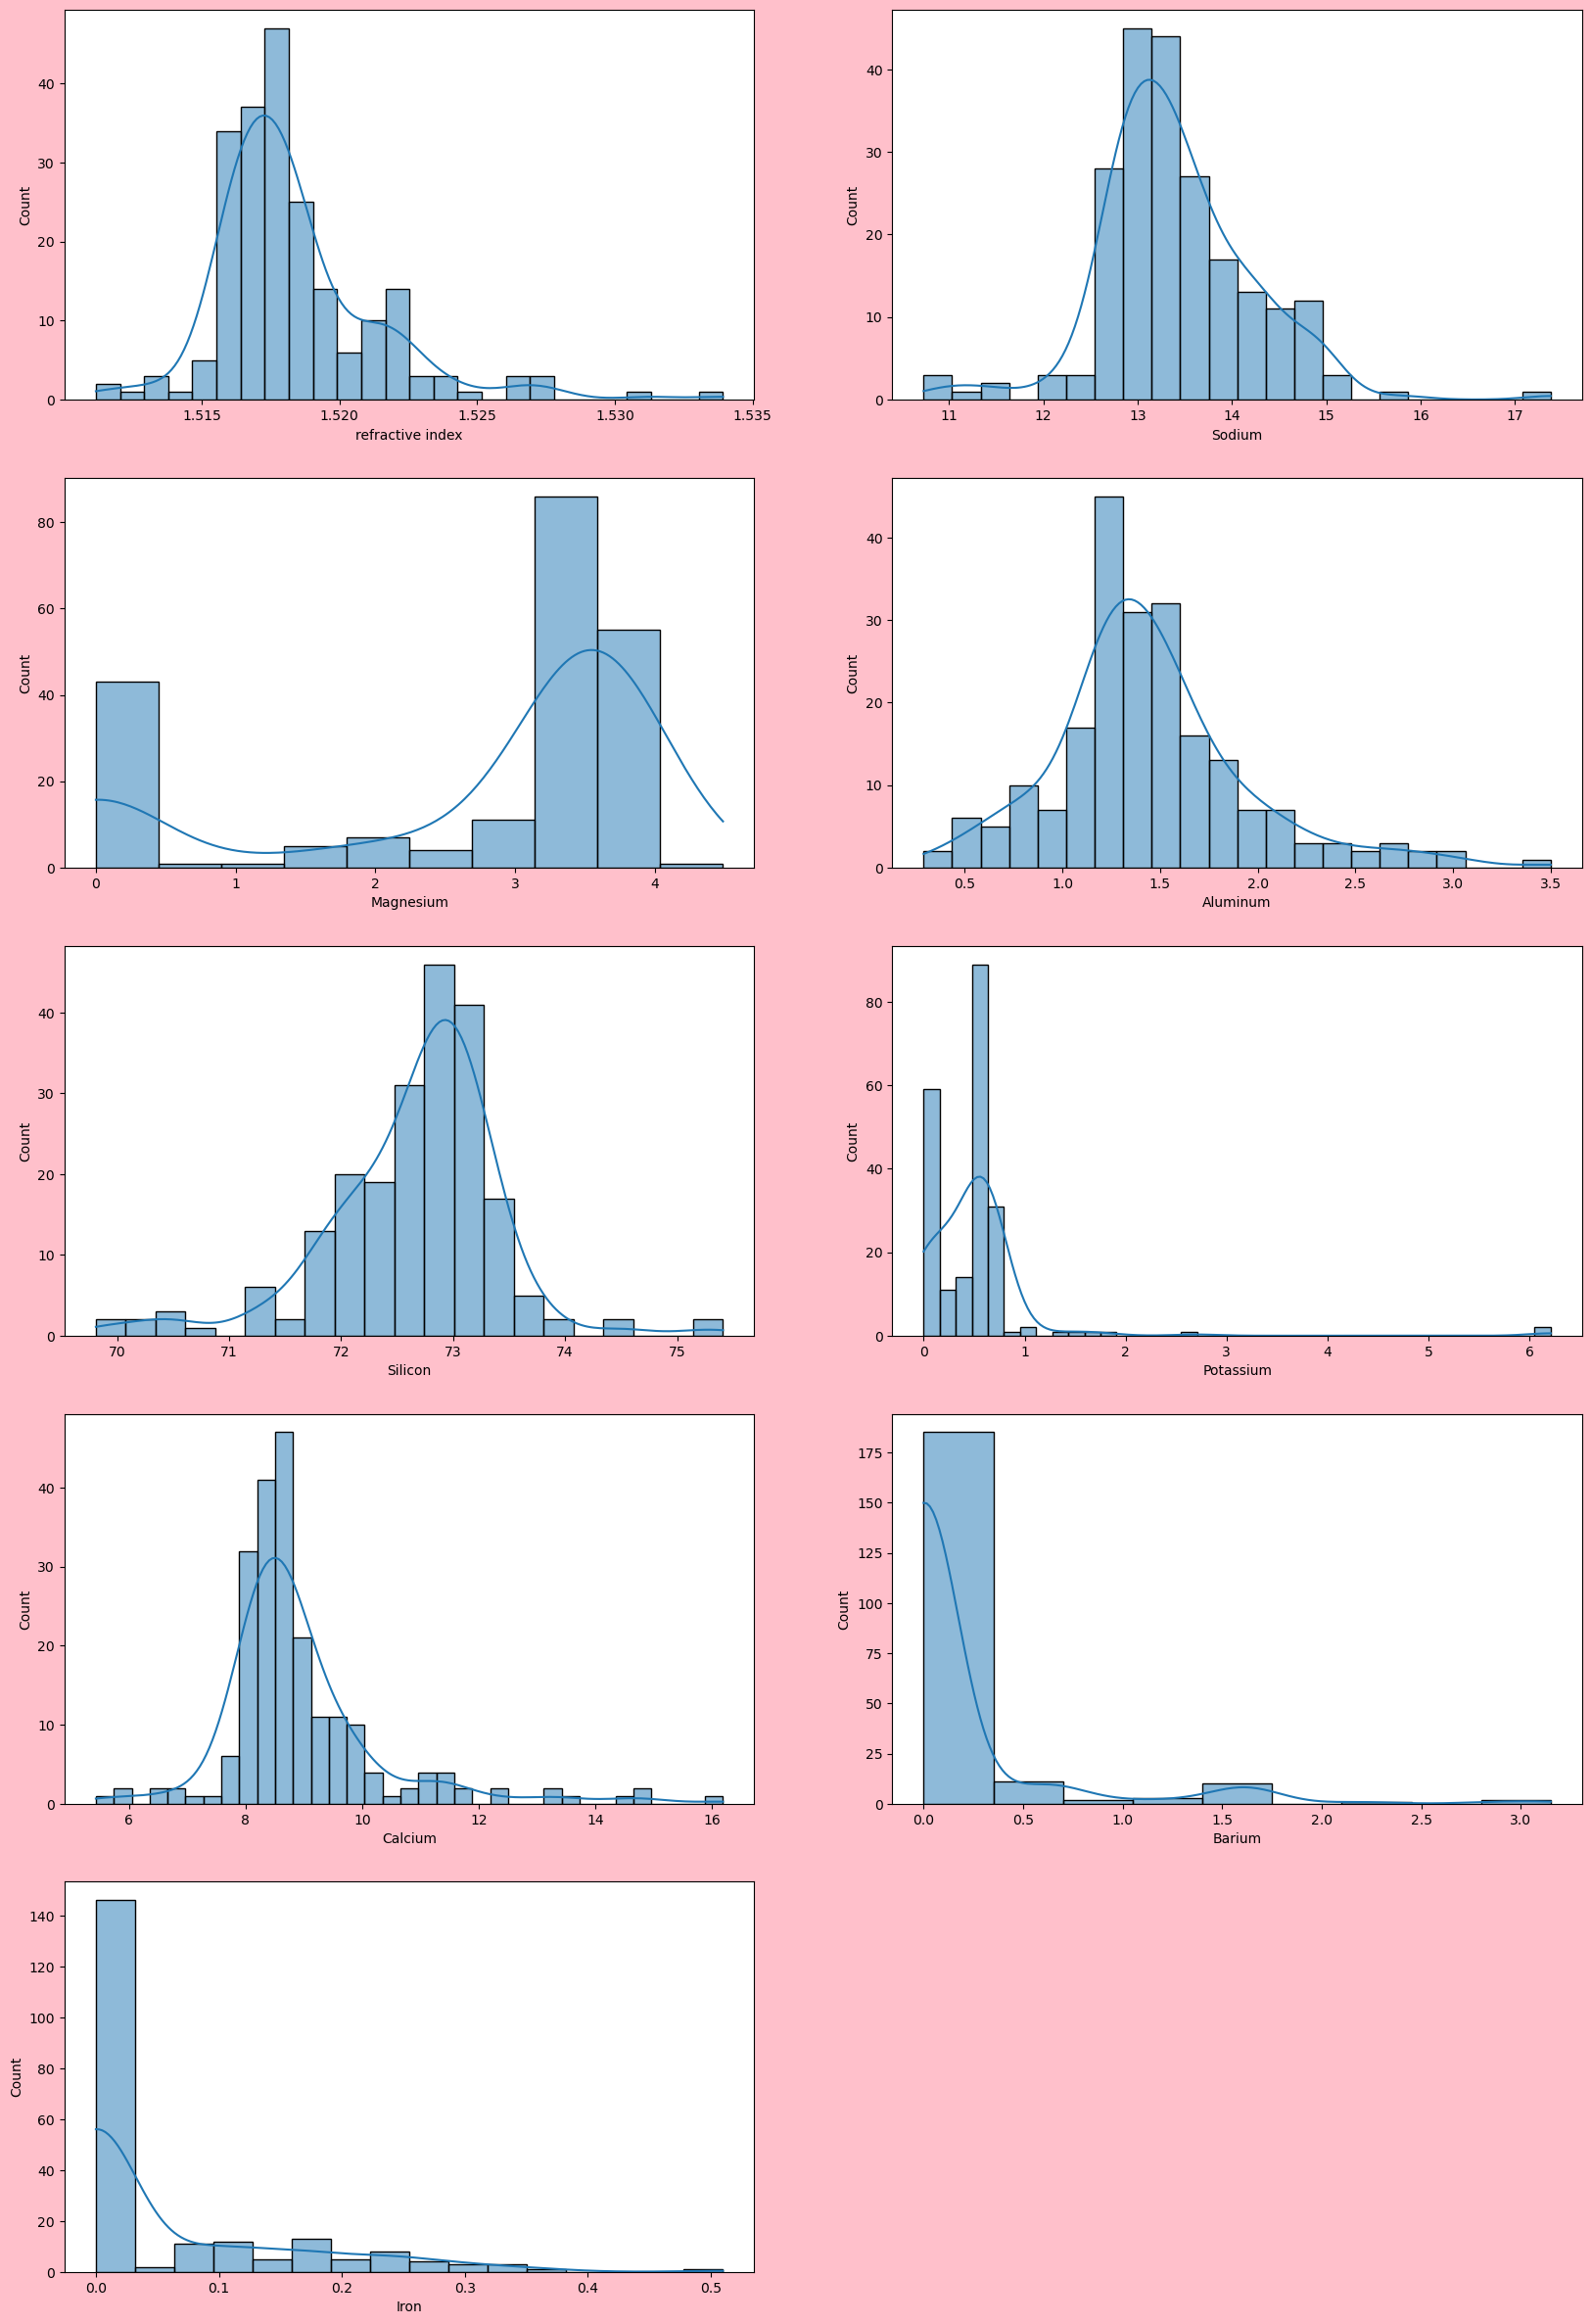

In [15]:
plt.figure(figsize=(20, 30), facecolor="pink")
plotnumber = 1

for i in df1: 
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.histplot(df1[i], kde=True)
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

WE can first observe from the description  and from these histplot that some of features are rightly skewed like iron , barium, calcium , potassium 

-- bivcariate Analysis

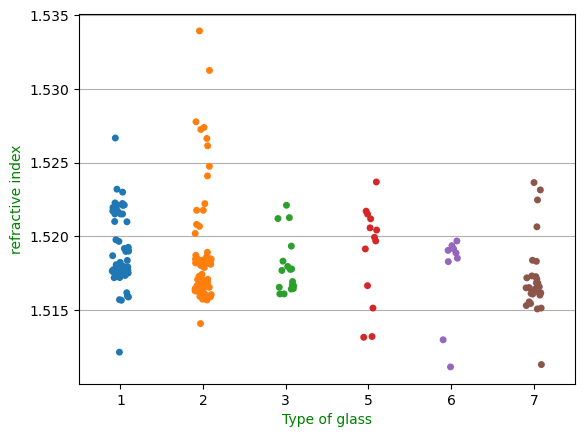

In [16]:
sns.stripplot(x ='Type of glass', y='refractive index', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('refractive index', color = 'g')
plt.grid(axis ='y')
plt.show()

we can see that there is no sign ificant relational between refrective index and Type of glass

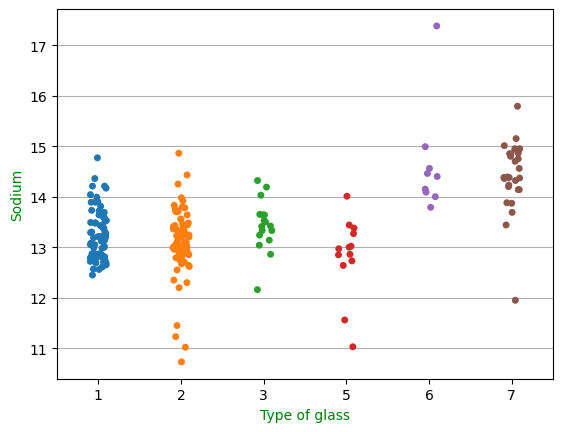

In [17]:
sns.stripplot(x ='Type of glass', y='Sodium', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Sodium', color = 'g')
plt.grid(axis ='y')
plt.show()

we can observe from this that glass type  7 i.e. for headlamps has mode sodium relative to other

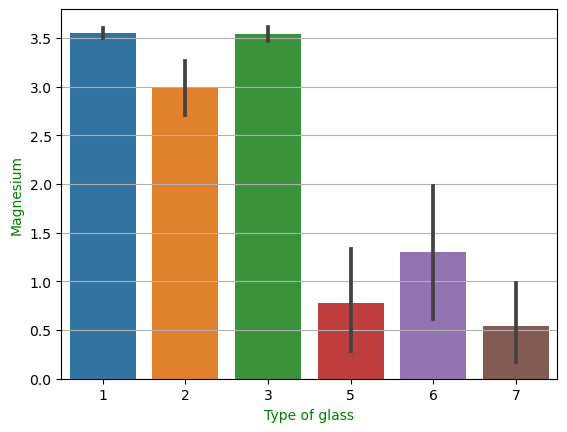

In [18]:
sns.barplot(x ='Type of glass', y='Magnesium', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Magnesium', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can observe that Glass 1,2,3 have morte magnesium compare to 5,6,7

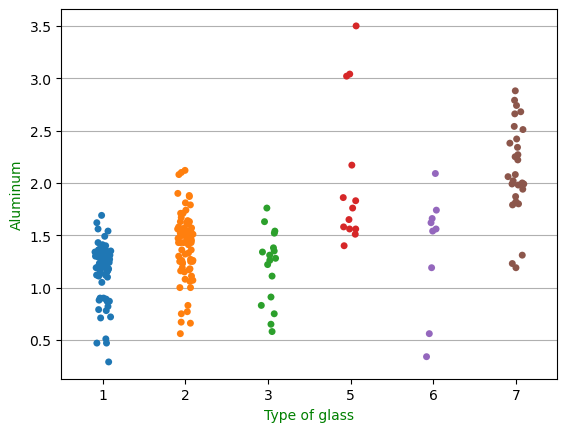

In [19]:
sns.stripplot(x ='Type of glass', y='Aluminum', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Aluminum', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can see that glass type 3 and 7 have more aluminium compare to other

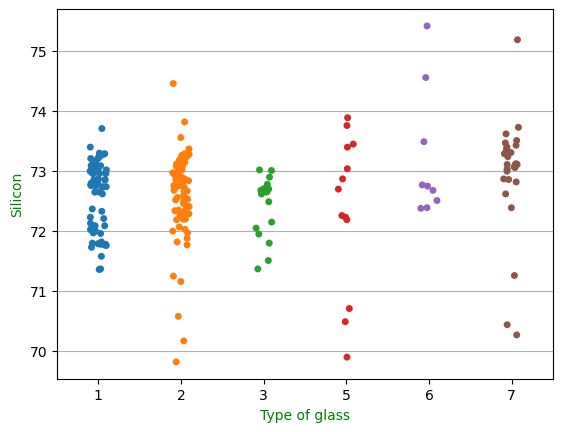

In [20]:
sns.stripplot(x ='Type of glass', y='Silicon', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Silicon', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can not find any significance difference in ther amount of silicon 

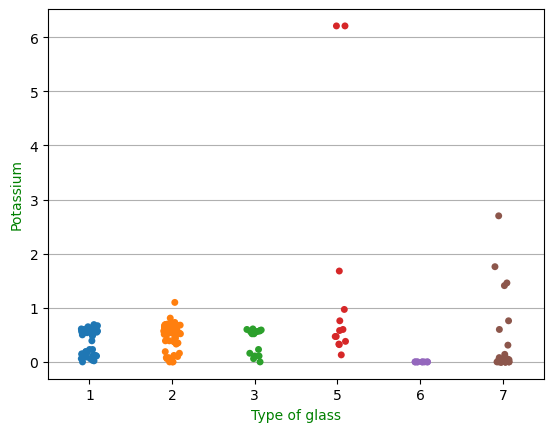

In [21]:
sns.stripplot(x ='Type of glass', y='Potassium', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Potassium', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can not find any significance difference in ther amount of Potassium

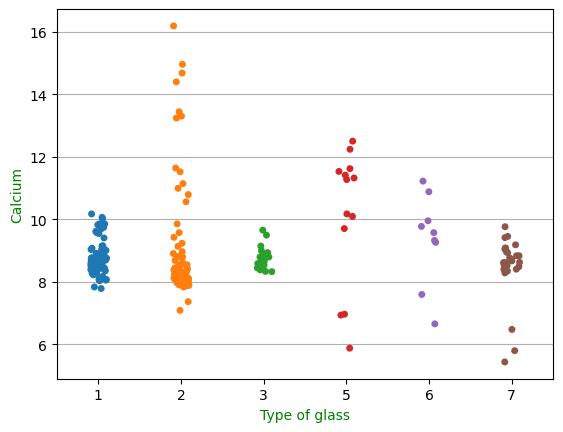

In [22]:
sns.stripplot(x ='Type of glass', y ='Calcium', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Calcium', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can not find any significance difference in ther amount of Calcium but only we can see that  some Type 2 glass have significantly more calcium

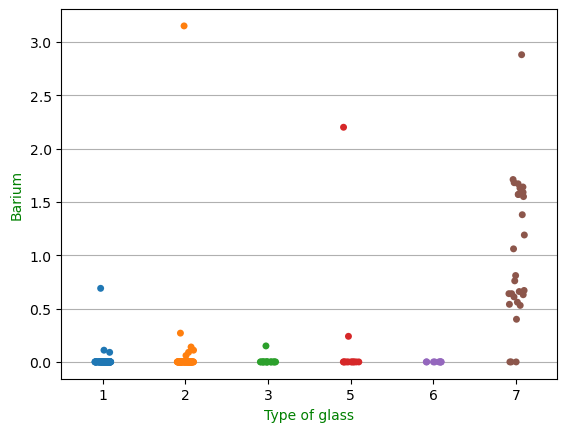

In [23]:
sns.stripplot(x ='Type of glass', y='Barium', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Barium', color = 'g')
plt.grid(axis ='y')
plt.show()

Here we can observe that except for one-onetype of other type of glass type 7 has saignificantly nore Barium 

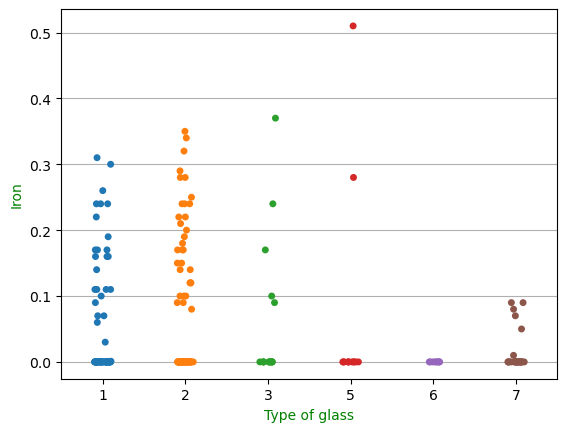

In [24]:
sns.stripplot(x ='Type of glass', y='Iron', data = df)
plt.xlabel('Type of glass',color = 'g')
plt.ylabel('Iron', color = 'g')
plt.grid(axis ='y')
plt.show()

here we can see that type 1,2,3 has more Iron than other type of glass

### -- Checking for Outliers

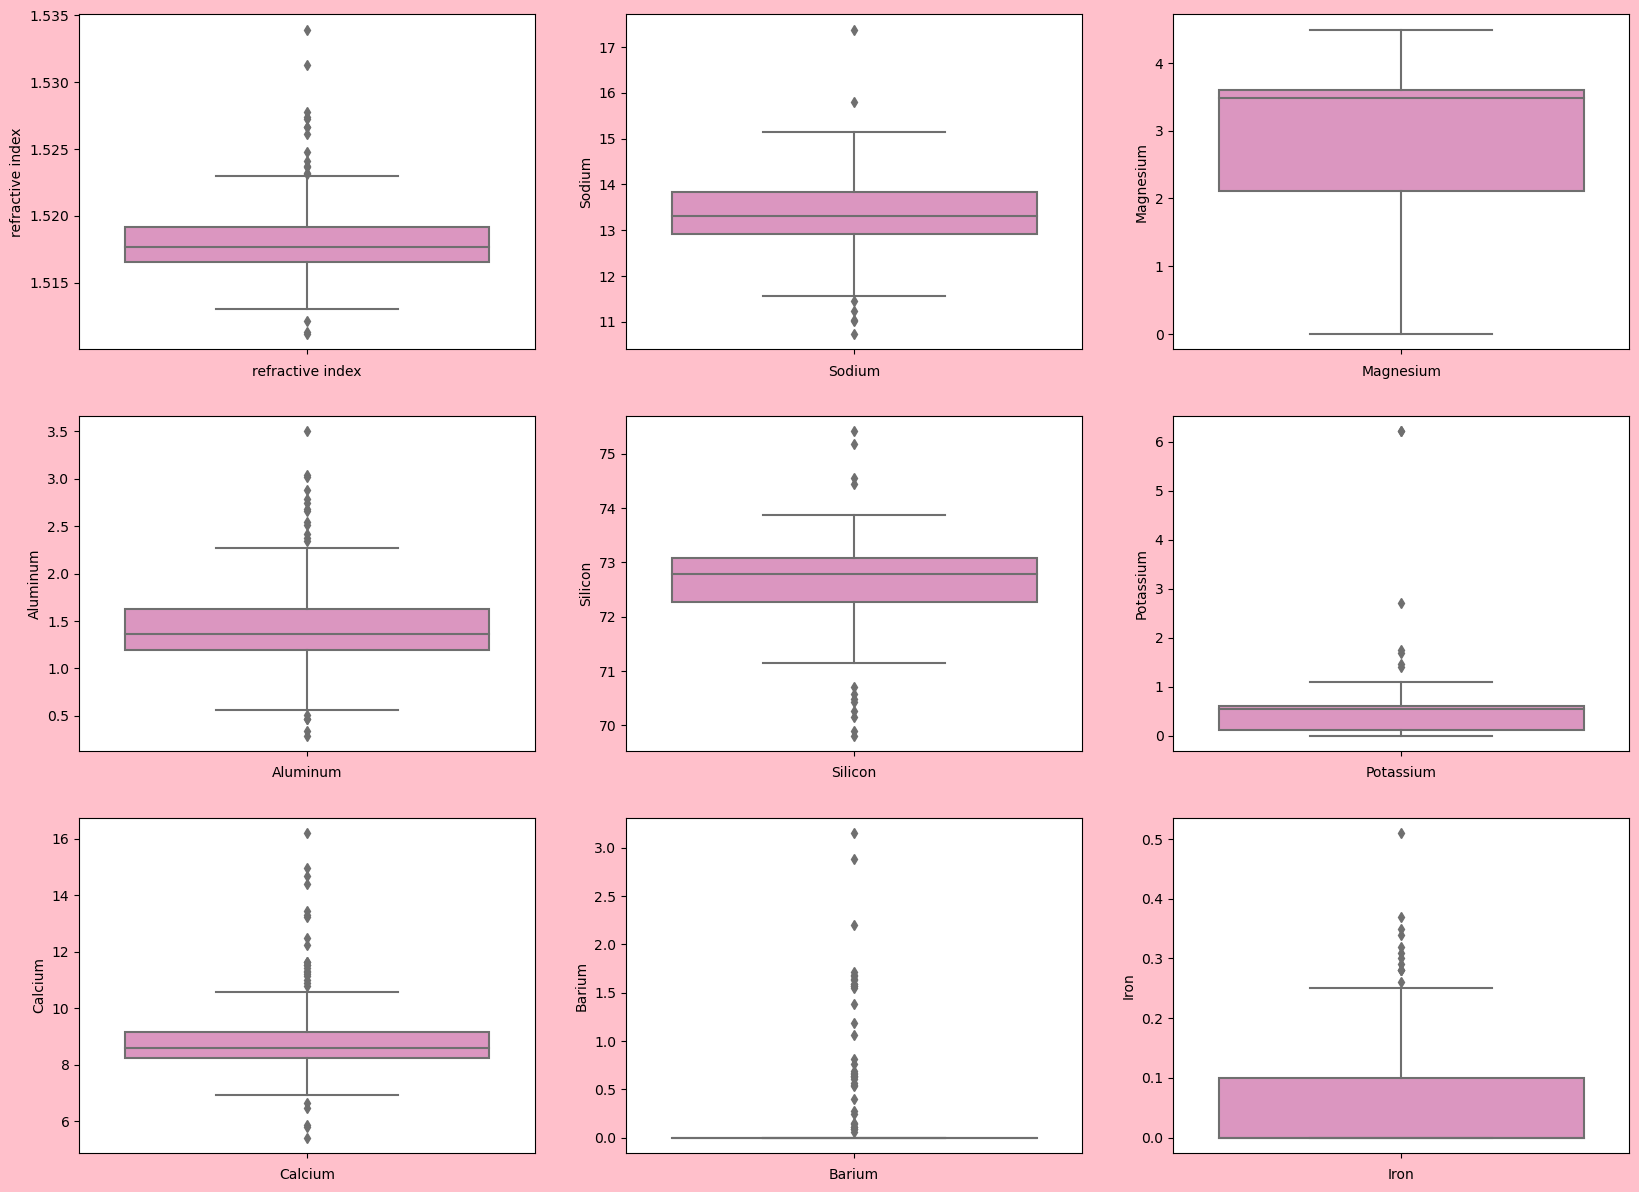

In [25]:
plt.figure(figsize=(20, 20), facecolor="pink")
plotnumber = 1

for column in df1:  
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot( y = df1[column] , palette = 'Set2_r')
        plt.xlabel(column)
    plotnumber += 1

plt.show()

we can see there are outliers present in the data so we will remove the outliers by using zscore 

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
Id number,,,,,,,,,
1,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.576228
2,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586515
3,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586515
4,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586515
5,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586515
...,...,...,...,...,...,...,...,...,...
210,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586515
211,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586515
212,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586515


In [27]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [28]:
df3= df[(z<3).all(axis=1)]

In [29]:
df3.shape

(194, 10)

In [30]:
print('percentage of dataloss',((df.shape[0]-df3.shape[0])/df.shape[0])*100)

percentage of dataloss 9.345794392523365


In [31]:
df=df3


#### herein z-score data loss is 9.34% , as so we will remove outliers of thast percentage 

In [32]:
df

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.000,7
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7


Changing the dtype of glass_type

--Checking for skewness 

In [33]:
df.skew()

refractive index    0.952733
Sodium              0.371482
Magnesium          -1.528849
Aluminum            0.658259
Silicon            -0.425450
Potassium           0.303175
Calcium             1.077962
Barium              3.188587
Iron                1.486522
Type of glass       1.284007
dtype: float64

 as we can see that Magnesium is highly left skewed and Calcium ,Barium, Iron are right skewed  so we will remove skewness by using Cuberoot and exponential transformation methods  

In [34]:
df['Magnesium'] = np.exp(df['Magnesium'])
df['Calcium'] = np.cbrt(df['Calcium'])
df['Barium'] = np.cbrt(df['Barium'])
df['Iron'] = np.cbrt(df['Iron'])


In [35]:
df.skew()

refractive index    0.952733
Sodium              0.371482
Magnesium          -0.385514
Aluminum            0.658259
Silicon            -0.425450
Potassium           0.303175
Calcium             0.611914
Barium              2.207594
Iron                0.881096
Type of glass       1.284007
dtype: float64

here we can still observe that Barium  still has skewness we will again use squareroot method  to remove the skewness

In [36]:
df['Barium'] = np.sqrt(df['Barium'])

In [37]:
df.skew()

refractive index    0.952733
Sodium              0.371482
Magnesium          -0.385514
Aluminum            0.658259
Silicon            -0.425450
Potassium           0.303175
Calcium             0.611914
Barium              1.979711
Iron                0.881096
Type of glass       1.284007
dtype: float64

here barium skewness is still rest all the data has moderately skewed and when we try more methods it will give Nan so we will continue with this skewness


### checking for correlation 

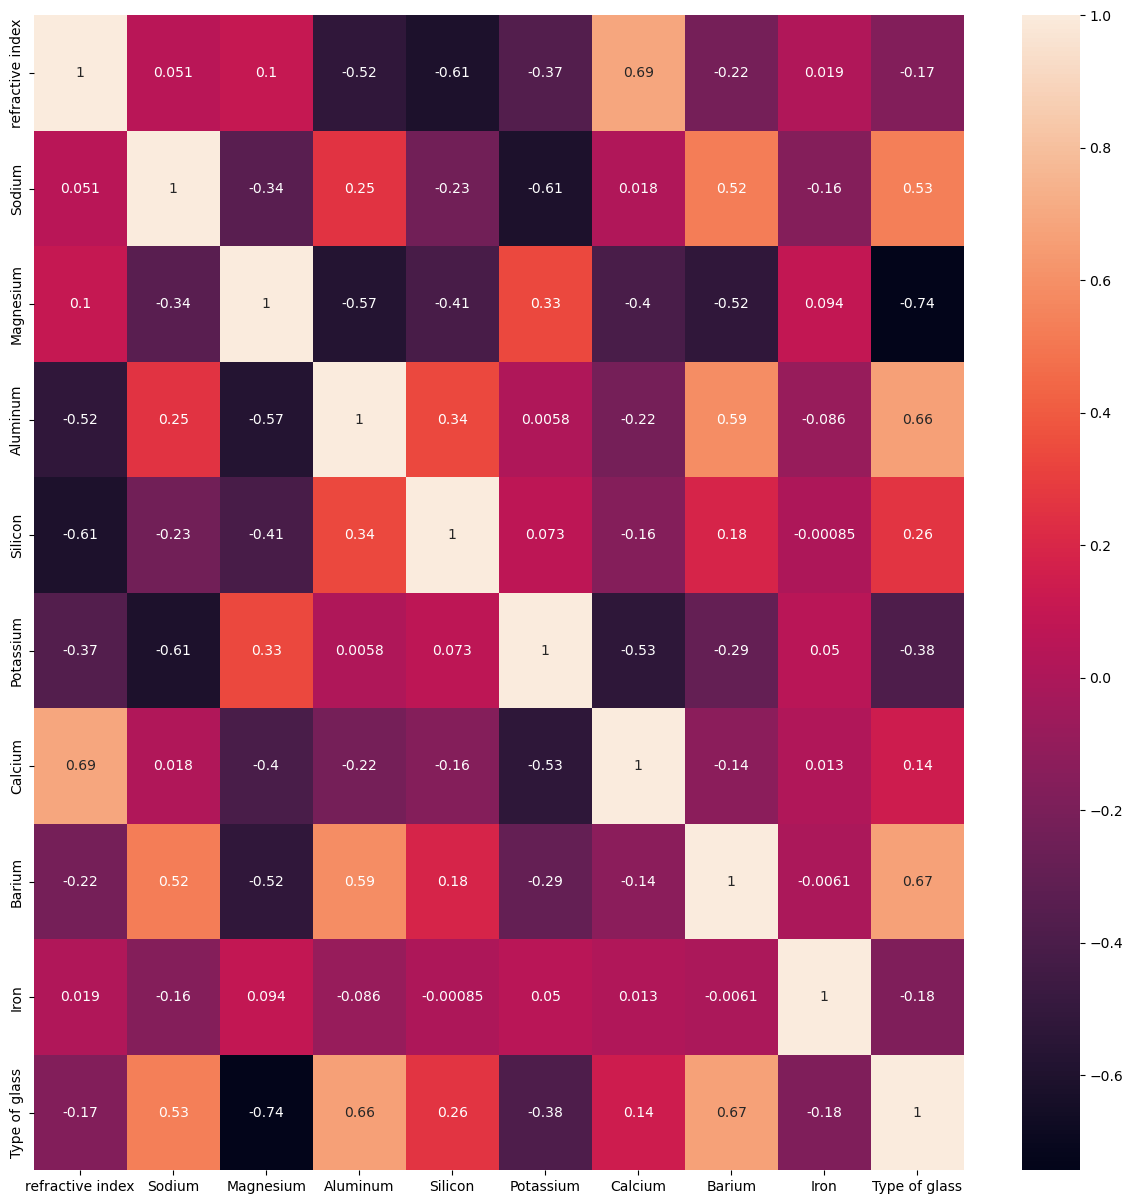

In [38]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here we can see refractive index, Magnesium, Potassium,Iron have negative correlation with the target variable and Sodium , Aluminium, Silcon , Calcium , Barium have positive correlation.

Silcon and Refractive Index has moderate correaltion, potassium and Sodium has moderate correlation and aluminium and Magnesium too have moderate correlation




##### Encoding features

In [39]:
df['glass_type']='1' 
df.loc[df['Type of glass'] >= 5, 'glass_type'] = '0' 
#  0 for non-windown glass
# 1 for window glass

In [40]:
df['glass_type'] = df['glass_type'].astype(int)

### Seperating features and target variable

In [41]:
X= df.drop(['Type of glass','glass_type'], axis=1)
Y=df.glass_type

In [42]:
X

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
Id number,,,,,,,,,
1,1.52101,13.64,89.121446,1.10,71.78,0.06,2.060643,0.000000,0.1
2,1.51761,13.89,36.598234,1.36,72.73,0.48,1.985732,0.000000,0.0
3,1.51618,13.53,34.813317,1.54,72.99,0.39,1.981496,0.000000,0.0
4,1.51766,13.21,40.044847,1.29,72.61,0.57,2.018168,0.000000,0.0
5,1.51742,13.27,37.337568,1.24,73.08,0.55,2.005816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51640,14.37,1.000000,2.74,72.85,0.00,2.114190,0.902400,0.0
210,1.51623,14.14,1.000000,2.88,72.61,0.08,2.093860,1.009759,0.0
211,1.51685,14.92,1.000000,1.99,73.06,0.00,2.032793,1.080354,0.0


### Scaling using Standard Scalar

In [43]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.291781,0.332127,3.945517,-0.729105,-1.612464,-1.319609,-0.041137,-0.429879,-0.283617
1,-0.197832,0.704398,0.555527,-0.141722,0.016082,0.172091,-1.038165,-0.429879,-0.680745
2,-0.824346,0.168328,0.440324,0.264928,0.461790,-0.147559,-1.094542,-0.429879,-0.680745
3,-0.175926,-0.308179,0.777981,-0.299864,-0.189629,0.491741,-0.606457,-0.429879,-0.680745
4,-0.281075,-0.218834,0.603245,-0.412822,0.616073,0.420708,-0.770849,-0.429879,-0.680745
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-1.742079,2.975928,0.221793,-1.532708,0.671549,2.233030,-0.680745
190,-0.802440,1.076668,-1.742079,3.292211,-0.189629,-1.248575,0.400966,2.549838,-0.680745
191,-0.530805,2.238153,-1.742079,1.281553,0.581788,-1.532708,-0.411806,2.758160,-0.680745
192,1.134057,1.404267,-1.742079,1.349328,1.198921,-1.532708,-0.368929,2.774654,-0.680745


## Oversampling 
 for making the data balanced

In [44]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [45]:
y1.value_counts()

1    154
0    154
Name: glass_type, dtype: int64

## Creating train test Split

In [46]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (x1,y1, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoost Classifier

In [48]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [49]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.961038961038961


In [50]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.96      0.98      0.97        45

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



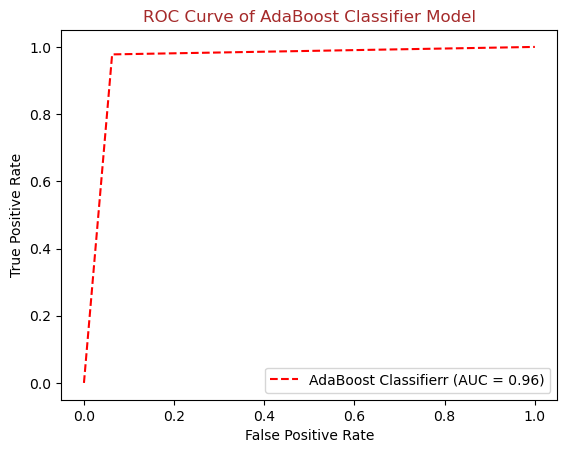

 Here we can area under the curve is --> 0.9576388888888889


In [51]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForest Classifier 

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [53]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.987012987012987


In [54]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        45

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



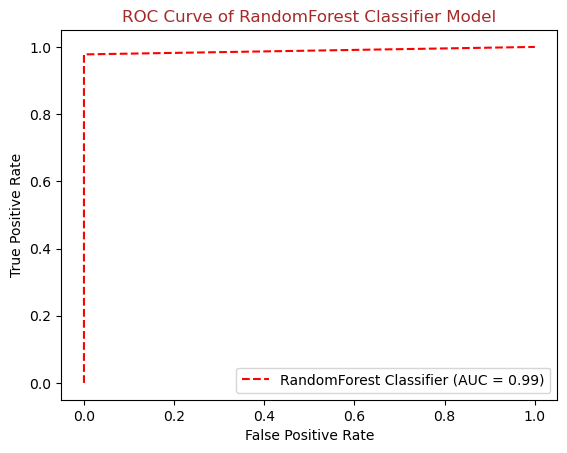

 Here we can area under the curve is --> 0.9888888888888889


In [55]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### Logistic Regression

In [56]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9653679653679653


In [57]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.974025974025974


In [58]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.96      0.98        45

    accuracy                           0.97        77
   macro avg       0.97      0.98      0.97        77
weighted avg       0.98      0.97      0.97        77



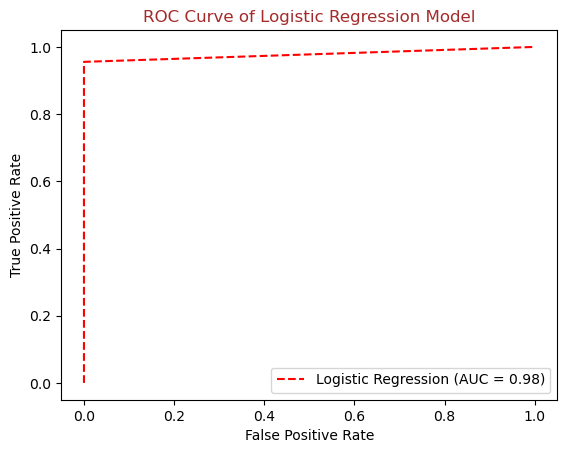

 Here we can area under the curve is --> 0.9777777777777779


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [60]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9956709956709957


In [61]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.987012987012987


In [62]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        45

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



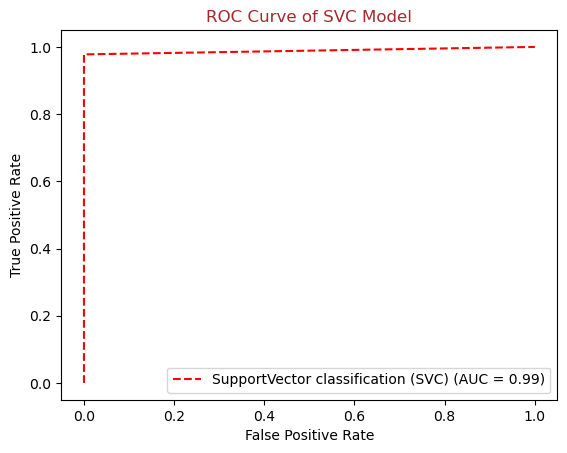

 Here we can area under the curve is --> 0.9888888888888889


In [63]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoosting Classifier

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [65]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.974025974025974


In [66]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        45

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77



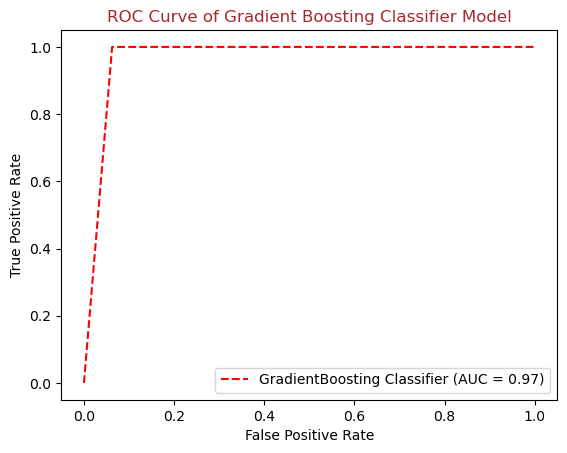

 Here we can area under the curve is --> 0.96875


In [67]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [68]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9826839826839827


In [69]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.961038961038961


In [70]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.98      0.96      0.97        45

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



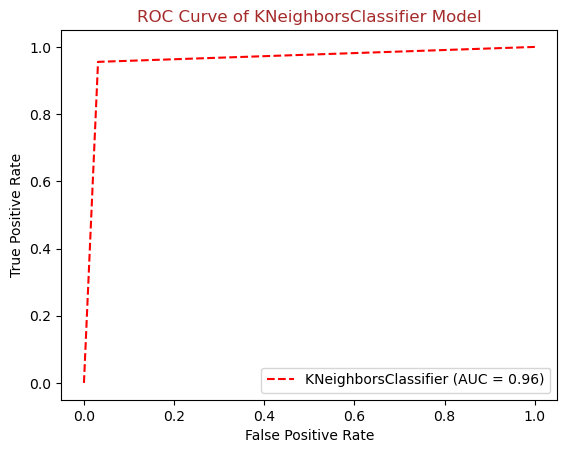

 Here we can area under the curve is --> 0.9621527777777779


In [71]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cscore1 = cross_val_score(rfc,x1,y1)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.98387097 1.         0.96774194 0.91803279 0.98360656]
mean of cscore->  0.9706504494976202
difference between accuracy and cross validation score is 0.01636253751536676


In [74]:
cscore2 = cross_val_score(KNN,x1,y1)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.96774194 0.98387097 1.         0.95081967 0.98360656]
mean of cscore->  0.9772078265468007
difference between accuracy and cross validation score is -0.01616886550783969


In [75]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.93548387 0.96774194 0.98387097 0.8852459  0.96721311]
mean of cscore->  0.9479111581173981
difference between accuracy and cross validation score is 0.013127802921562903


In [76]:
cscore4 = cross_val_score(GBC,x1,y1)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.96774194 0.98387097 0.98387097 0.95081967 1.        ]
mean of cscore->  0.9772607086197779
difference between accuracy and cross validation score is -0.0032347345938038563


In [77]:
cscore5 = cross_val_score(SVM,x1,y1)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.98387097 0.98387097 0.96774194 0.93442623 0.98360656]
mean of cscore->  0.9707033315705976
difference between accuracy and cross validation score is 0.01630965544238938


In [78]:
cscore6 = cross_val_score(log_R,x1,y1)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.9516129  1.         0.96774194 0.91803279 0.98360656]
mean of cscore->  0.9641988365943945
difference between accuracy and cross validation score is 0.00982713743157948


##### after analysing cross value score we can conclude Logistic regression accuracy is good i.e. 96.4% with least deviation of only 0.9% so we choose Logistic regression 

## Hyper parameter tuning

In [83]:
log_R.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [84]:
parameters = {'penalty': ['l1', 'l2'],  
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
             'max_iter': [100, 200, 300],  
             'multi_class': ['ovr', 'multinomial'],  
             'class_weight': [None, 'balanced'],  
             'random_state': [42],  
             }


In [89]:
GSC = GridSearchCV(LogisticRegression(),parameters,cv= 5)

In [90]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [91]:
GSC.best_params_

{'class_weight': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear'}

In [102]:
LR_final =LogisticRegression(class_weight= None, max_iter= 100,multi_class='ovr',penalty='l2', random_state= 42,
          solver= 'liblinear')
LR_final.fit(X_train, Y_train)
y_pred = LR_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred )  
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9653679653679653


In [106]:
y_pred_testLR  = LR_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR )  
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.974025974025974


we can see after hyperparametertuning there is very slightly increase in the accuracy

## Model Saving

In [108]:
import joblib
joblib.dump(LR_final,'model for glass identification ')

['model for glass identification ']

# Prediction 

In [109]:
mymodel = joblib.load('model for glass identification')
prdt = mymodel.predict(X_test)
prdt

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [110]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
72,1,1
73,1,1
74,0,0
75,0,0


--we can see the prediction based on the model we build 
our model is predicting almost all the test data